## ACF (Auto Correlation Function)
Auto Correlation function takes into consideration of all the past observations irrespective of its effect on the future or present time period. It calculates the correlation between the t and (t-k) time period. It includes all the lags or intervals between t and (t-k) time periods. Correlation is always calculated using the Pearson Correlation formula.

## PACF(Partial Correlation Function)
The PACF determines the partial correlation between time period t and t-k. It doesn’t take into consideration all the time lags between t and t-k. For e.g. let's assume that today's stock price may be dependent on 3 days prior stock price but it might not take into consideration yesterday's stock price closure. Hence we consider only the time lags having a direct impact on future time period by neglecting the insignificant time lags in between the two-time slots t and t-k.

### How to differentiate when to use ACF and PACF?
Let's take an example of sweets sale and income generated in a village over a year.
Under the assumption that every 2 months there is a festival in the village, we take out
the historical data of sweets sale and income generated for 12 months. 

If we plot the time (in months) then we can observe that when it comes to calculating the sweets sale we are
interested in only alternate months as the sale of sweets increases every two months. But
if we are to consider the income generated next month then we have to take into
consideration all the 12 months of last year.

So in the above situation, we will use ACF to find out the income generated in the future
but we will be using PACF to find out the sweets sold in the next month.

PACF = to find the sweets sold next month

ACF  = to find the income generated in future

<h4> Importing Dataset </h4>

In [1]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"

<h4> Importing Packages and Visualizing the Dataset </h4>

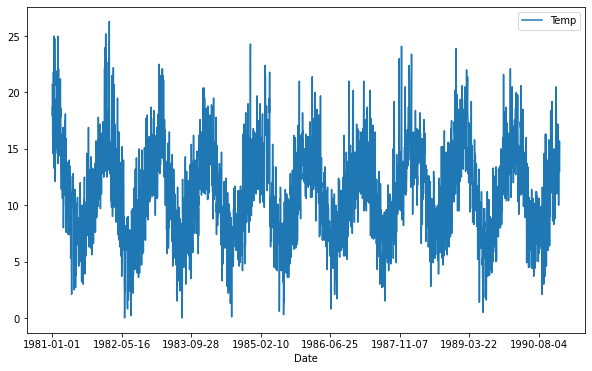

In [10]:
from pandas import read_csv
import matplotlib.pyplot as plt
series = read_csv(url, header=0, index_col=0)
series.plot()
plt.rcParams['figure.figsize'] = [30,6]
plt.show()

<h4> Plotting the AutoCorrelation Plot </h4>

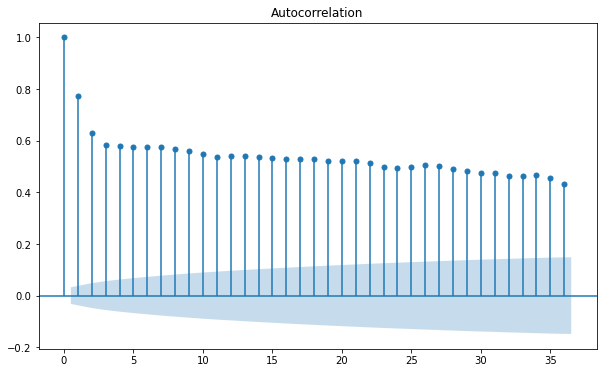

In [15]:
from statsmodels.graphics.tsaplots import plot_acf
plt.rcParams['figure.figsize'] = [10,6]
plot_acf(series)
plt.show()

<h4> Plotting the PartialAutoCorrelation Plot </h4>

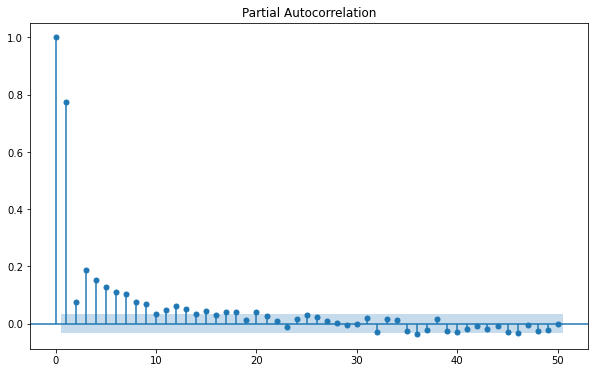

In [16]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(series, lags=50)
plt.show()

<h3> Calculating Autocorrelation and Partial Autocorrelation </h3>

In [17]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.tsatools import lagmat
import matplotlib.pyplot as plt

In [18]:
# settings
plt.style.use("seaborn")
plt.rcParams["figure.figsize"] = (16, 8)
%config InlineBackend.figure_format = "retina"

In [19]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"

In [20]:
# Data
df = pd.read_csv(url, index_col=0)
df.index = pd.to_datetime(df.index)
y = df["Passengers"]
y

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: Passengers, Length: 144, dtype: int64

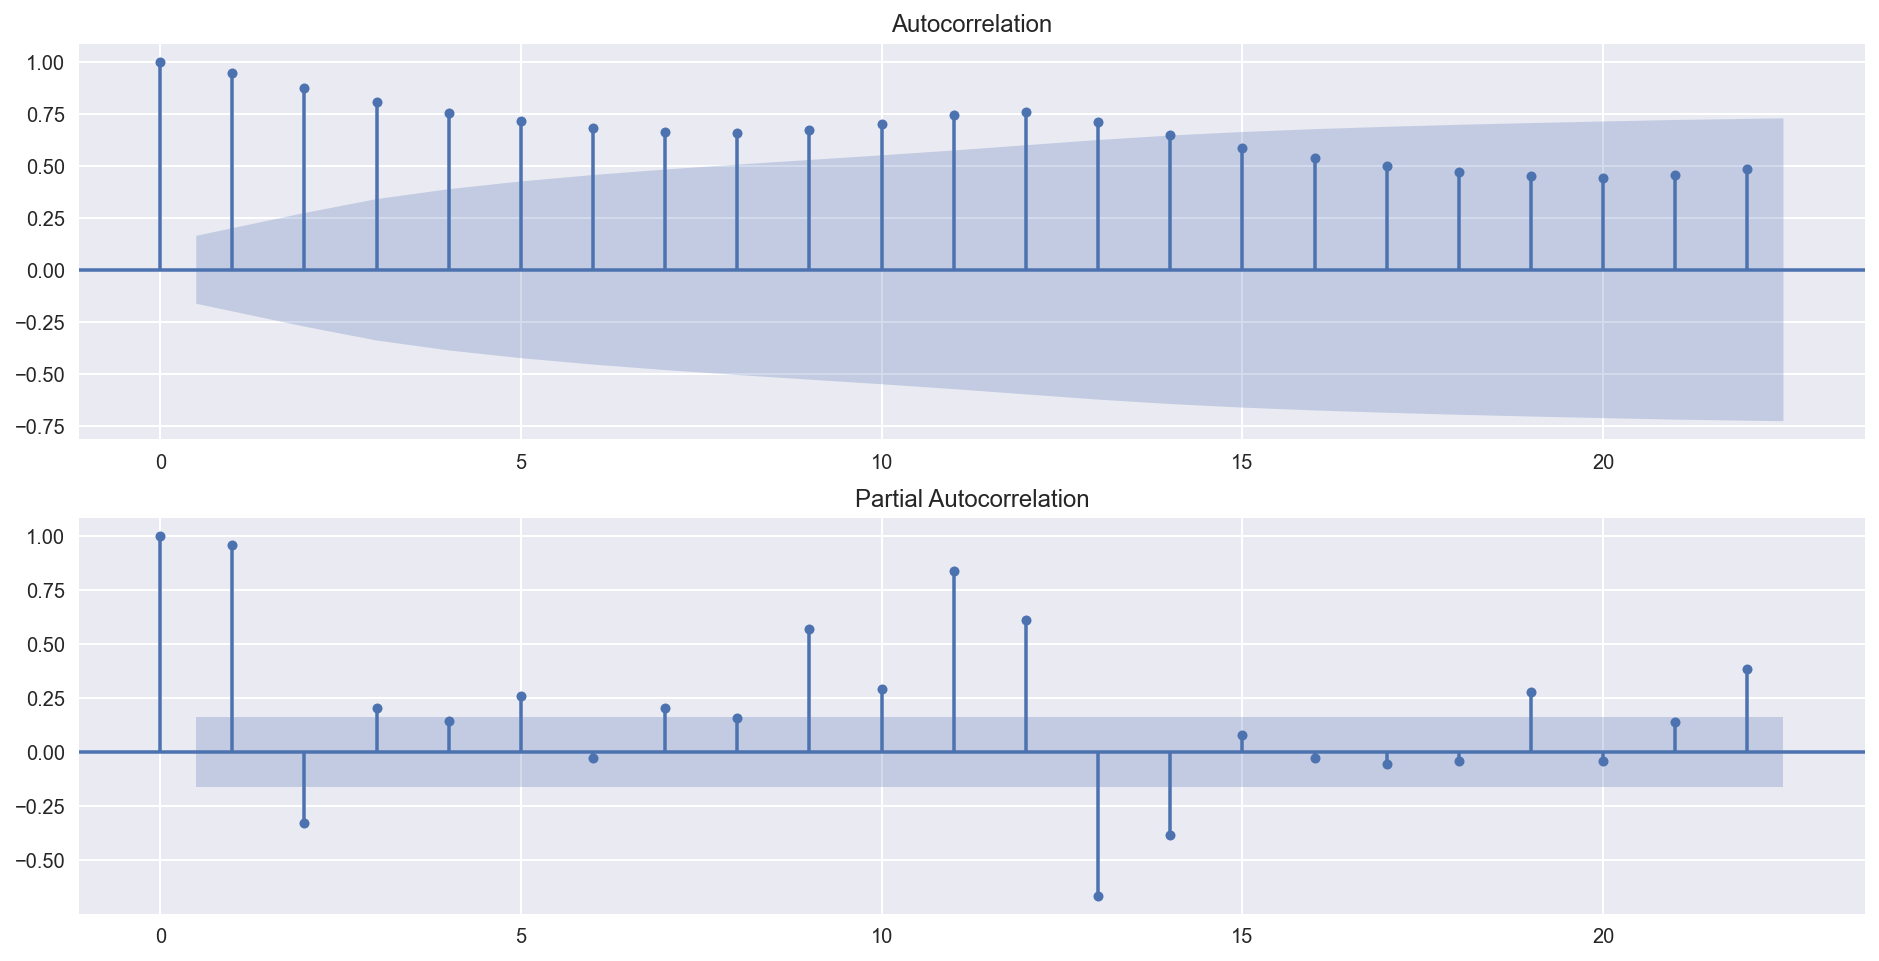

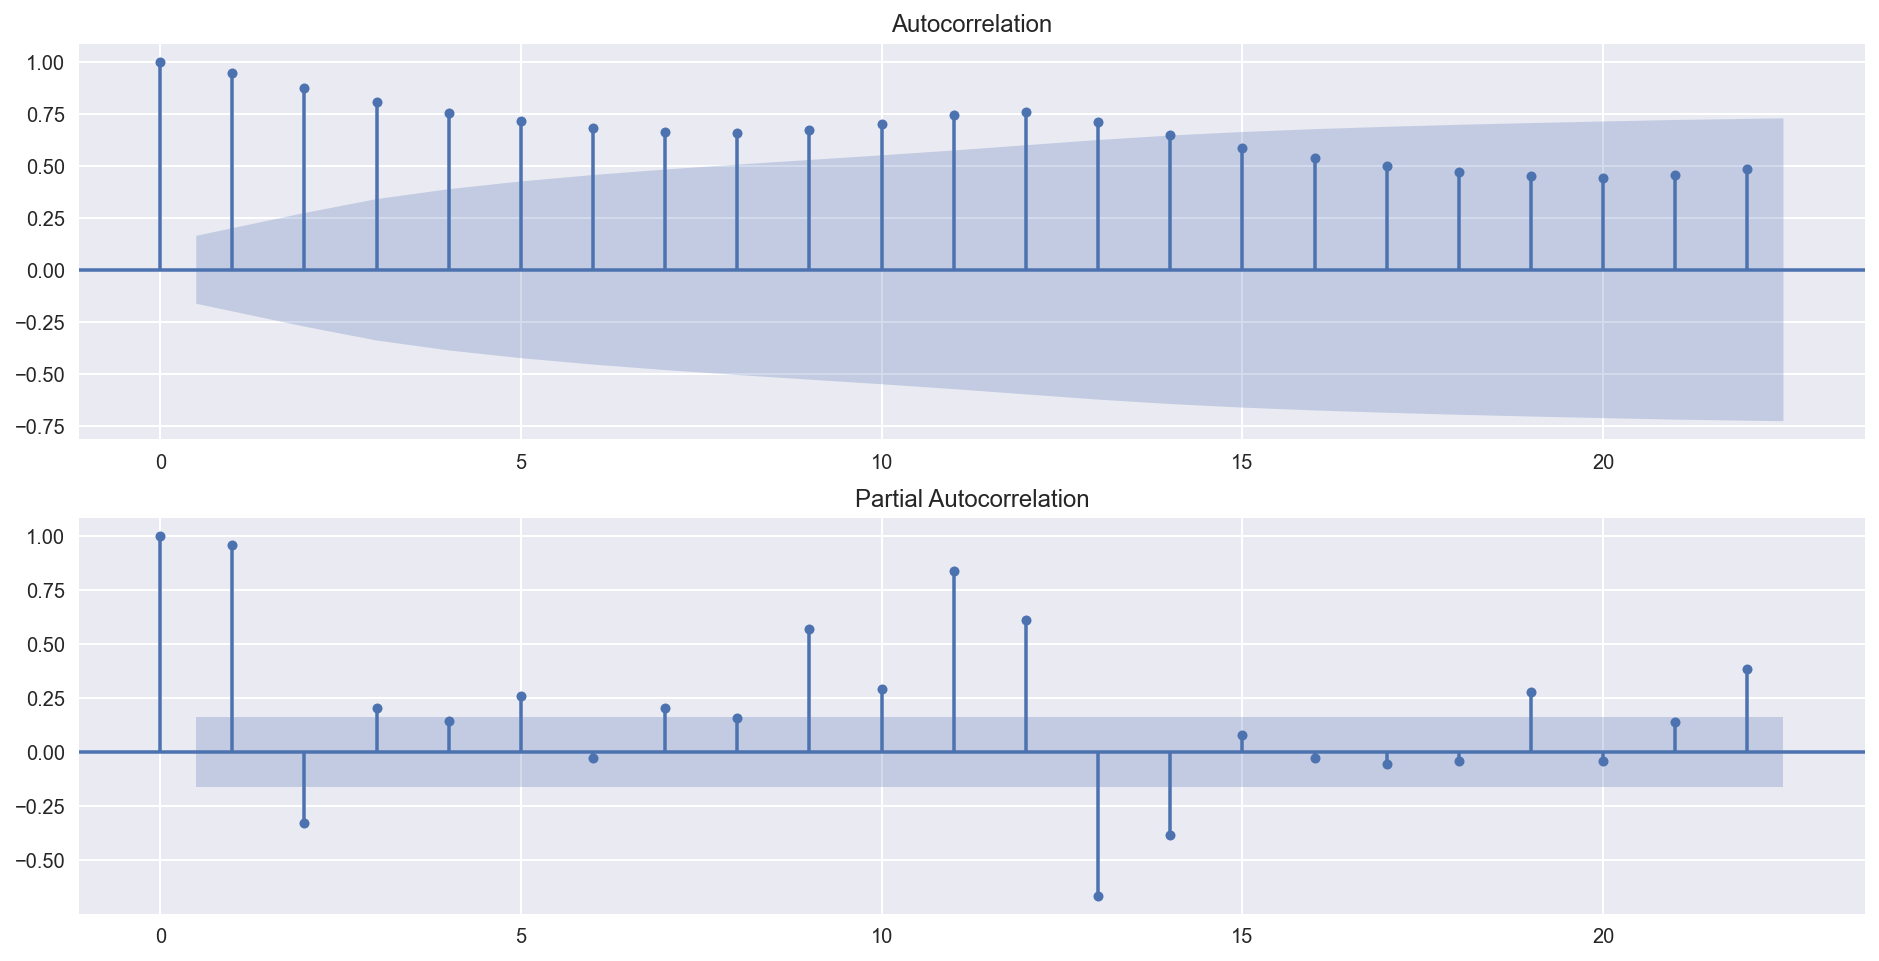

In [21]:
fig, ax = plt.subplots(2, 1)
plot_acf(df, ax=ax[0])
plot_pacf(df, ax=ax[1], method="ols")

In [22]:
#Autocorrelation Function (ACF)
acf(y, nlags=10)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


array([1.        , 0.94804734, 0.87557484, 0.80668116, 0.75262542,
       0.71376997, 0.6817336 , 0.66290439, 0.65561048, 0.67094833,
       0.70271992])

In [24]:
#Replicating it the wrong way
acf_df = pd.DataFrame()
for lag in range(0, 11):
    acf_df[f"y_lag_{lag}"] = y.shift(lag)

In [42]:
acf_df

,y_lag_0,y_lag_1,y_lag_2,y_lag_3,y_lag_4,y_lag_5,y_lag_6,y_lag_7,y_lag_8,y_lag_9,y_lag_10
Month,,,,,,,,,,,
1949-01-01,112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1949-02-01,118,112.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1949-03-01,132,118.0,112.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1949-04-01,129,132.0,118.0,112.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1949-05-01,121,129.0,132.0,118.0,112.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1960-08-01,606,622.0,535.0,472.0,461.0,419.0,391.0,417.0,405.0,362.0,407.0
1960-09-01,508,606.0,622.0,535.0,472.0,461.0,419.0,391.0,417.0,405.0,362.0
1960-10-01,461,508.0,606.0,622.0,535.0,472.0,461.0,419.0,391.0,417.0,405.0


In [30]:
acf_df.corr()["y_lag_0"].values

array([1.        , 0.96019465, 0.89567531, 0.83739477, 0.7977347 ,
       0.78594315, 0.7839188 , 0.78459213, 0.79221505, 0.8278519 ,
       0.8827128 ])

In [31]:
#Replicating it the right way
# benchmark
acf(y, nlags=10)
# replicating the acf function
acf_list = []
mu = y.mean()
for lag in range(0, 11):
    acf_list.append(np.dot((y - mu).iloc[lag:], (y.shift(lag) - mu).iloc[lag:]) / sum((y - mu)** 2))
np.array(acf_list)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


array([1.        , 0.94804734, 0.87557484, 0.80668116, 0.75262542,
       0.71376997, 0.6817336 , 0.66290439, 0.65561048, 0.67094833,
       0.70271992])

In [32]:
# alternative way to write the same using sum instead of the dot product
acf_list = []
mu = y.mean()
for lag in range(0, 11):
    acf_list.append(sum((y - mu).iloc[lag:] * (y.shift(lag) - mu).iloc[lag:]) / sum((y - mu)** 2))
np.array(acf_list)

array([1.        , 0.94804734, 0.87557484, 0.80668116, 0.75262542,
       0.71376997, 0.6817336 , 0.66290439, 0.65561048, 0.67094833,
       0.70271992])

In [33]:
#Partial Autocorrelation Function (PACF)
pacf(df, nlags=10, method="ols")
N_LAGS = 10
# the first partial autocorrelation is always equal to 1
pacf_list = [1]
X = pd.DataFrame(lagmat(y, N_LAGS))
X.columns = [f"lag_{lag+1}" for lag in range(10)]
for k in range(1, N_LAGS + 1):
    fitted_model = LinearRegression().fit(X.iloc[k:, :k],y.iloc[k:])
    pacf_list.append(fitted_model.coef_[-1])
np.array(pacf_list)

array([ 1.        ,  0.95893198, -0.32983096,  0.2018249 ,  0.14500798,
        0.25848232, -0.02690283,  0.20433019,  0.15607896,  0.56860841,
        0.29256358])

In [41]:
#Below you can see how the PACF values change when including more lags using the inefficient method
pacf(y, 2, method="ols-inefficient")

array([ 1.        ,  0.95868964, -0.33258806])

In [38]:
pacf(y, 4, method="ols-inefficient")

array([ 1.        ,  0.95860315, -0.33427195,  0.1970437 ,  0.13909745])

In [39]:
#For comparison's sake, we run the same two calls to the pacf function using the efficient method.
pacf(y, 2, method="ols")

array([ 1.        ,  0.95893198, -0.32983096])

In [40]:
pacf(y, 4, method="ols")

array([ 1.        ,  0.95893198, -0.32983096,  0.2018249 ,  0.14500798])

## Visualizing the Inference

In [58]:
a = pacf(y, 2, method="ols-inefficient")
b = pacf(y, 4, method="ols-inefficient")
c = pacf(y, 2, method="ols")
d = pacf(y, 4, method="ols")

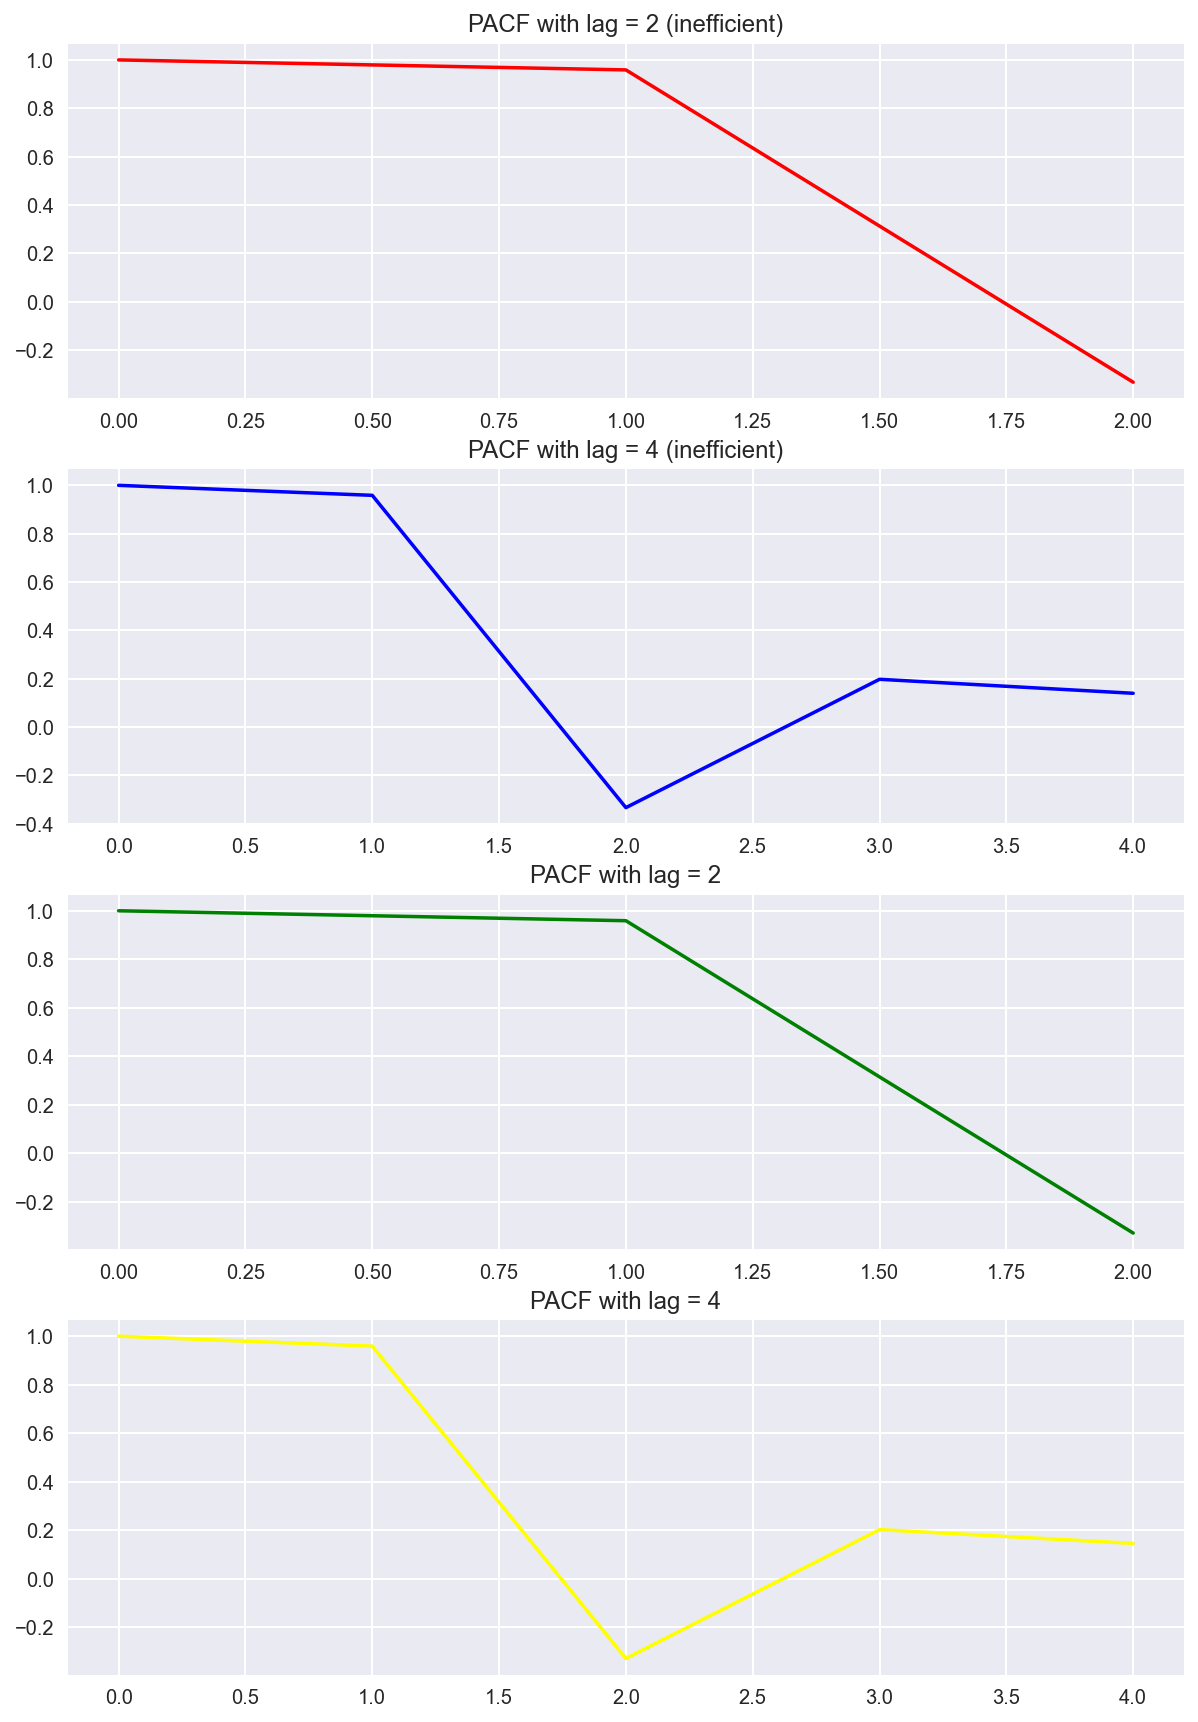

In [66]:
plt.rcParams["figure.figsize"] = [10, 15]

plt.subplot(4, 1, 1)
plt.plot(a,color="red")
plt.title("PACF with lag = 2 (inefficient)")

plt.subplot(4, 1, 2)
plt.plot(b,color="blue")
plt.title("PACF with lag = 4 (inefficient)")

plt.subplot(4, 1, 3)
plt.plot(c,color="green")
plt.title("PACF with lag = 2")

plt.subplot(4, 1, 4)
plt.plot(d,color="yellow")
plt.title("PACF with lag = 4")

plt.show()

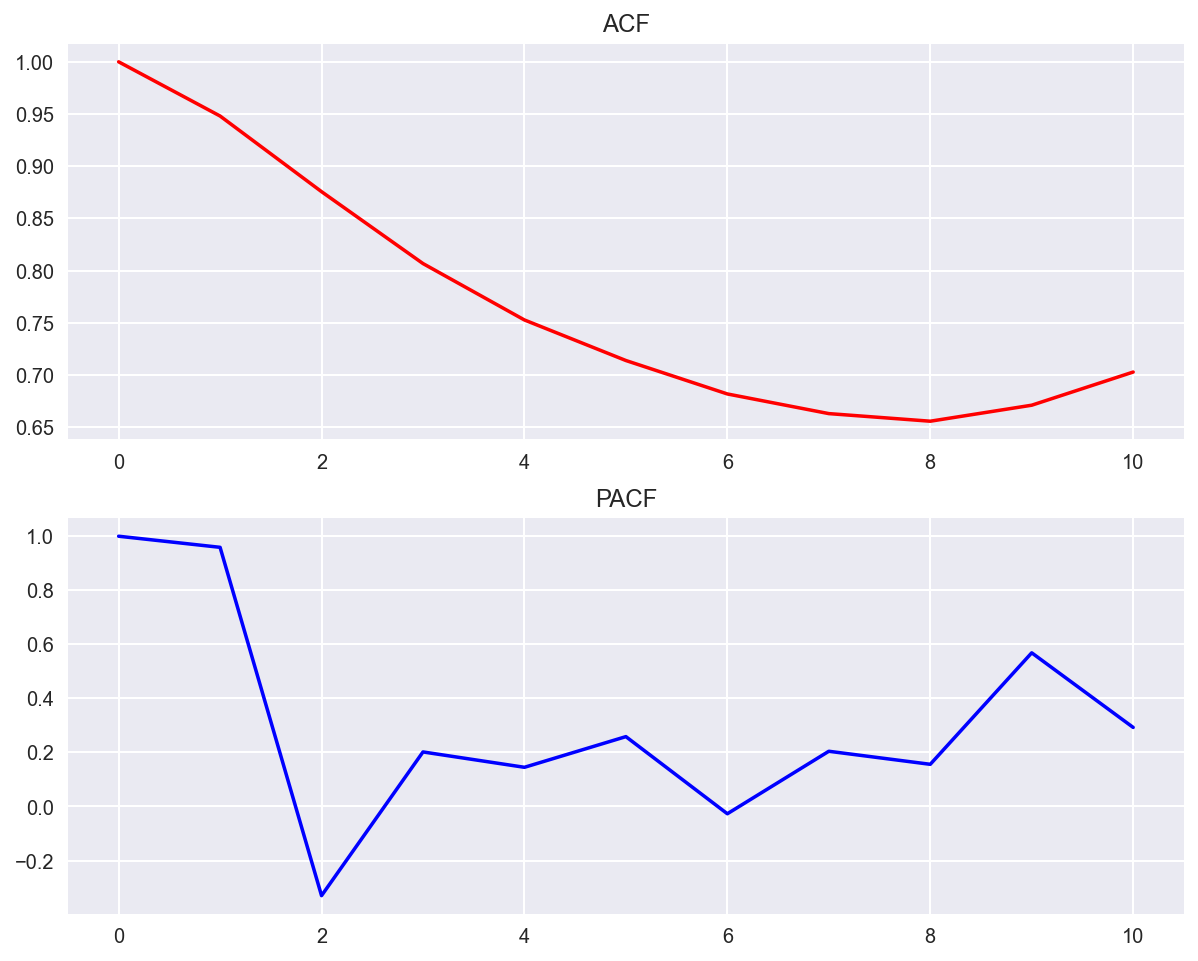

In [60]:
plt.rcParams["figure.figsize"] = [10, 8]

plt.subplot(2, 1, 1)
plt.plot(acf_list,color="red")
plt.title("ACF")

plt.subplot(2, 1, 2)
plt.plot(pacf_list,color="blue")
plt.title("PACF")
plt.show()